In [1]:
import os
# start the notebook in the root of the git repo, so that we can import our stuff
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')


from src.simulation.graphs import gen_bba_graph, create_model_graph, adjacency_mat, friendliness_mat, graph_shuffle_indices, graph_from_friendliness_mat
import numpy as np
import graph_tool.all as gt
import matplotlib.cm as cm
import matplotlib.pyplot as plt


(ipykernel_launcher.py:82824): Gtk-WARNING **: 11:37:40.325: Locale not supported by C library.
	Using the fallback 'C' locale.


In [2]:
def draw(g):
    gt.graph_draw(g, 
              vertex_fill_color=g.vertex_index, vertex_size=8,
              vcmap=cm.plasma,
              #edge_pen_width=1
              )



# get the degrees of each vertex
def plot_degrees(g: gt.Graph, sort=False):
    deg = g.get_out_degrees(g.get_vertices())
    if sort:
        deg = sorted(deg)
    plt.plot(deg)

In [3]:
g = gen_bba_graph(100, 3, lambda: 1)

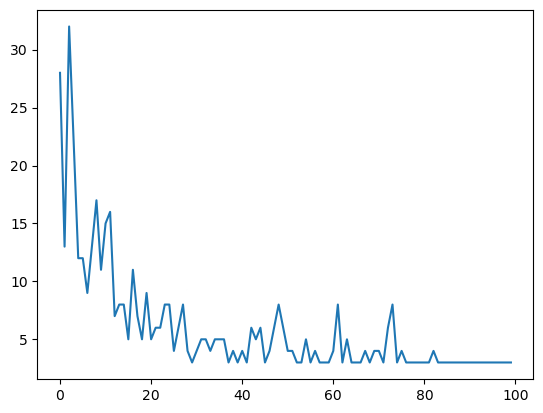

In [4]:
plot_degrees(g, sort=False)

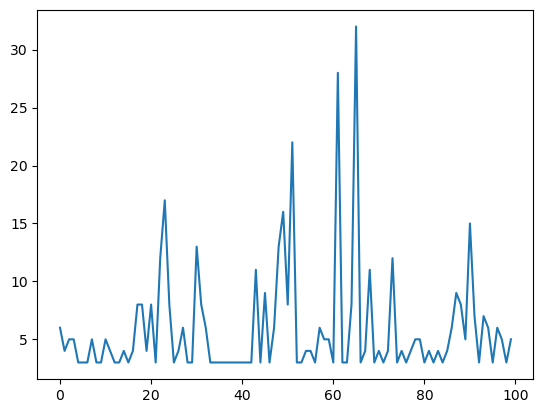

In [5]:
plot_degrees(graph_shuffle_indices(g), sort=False)

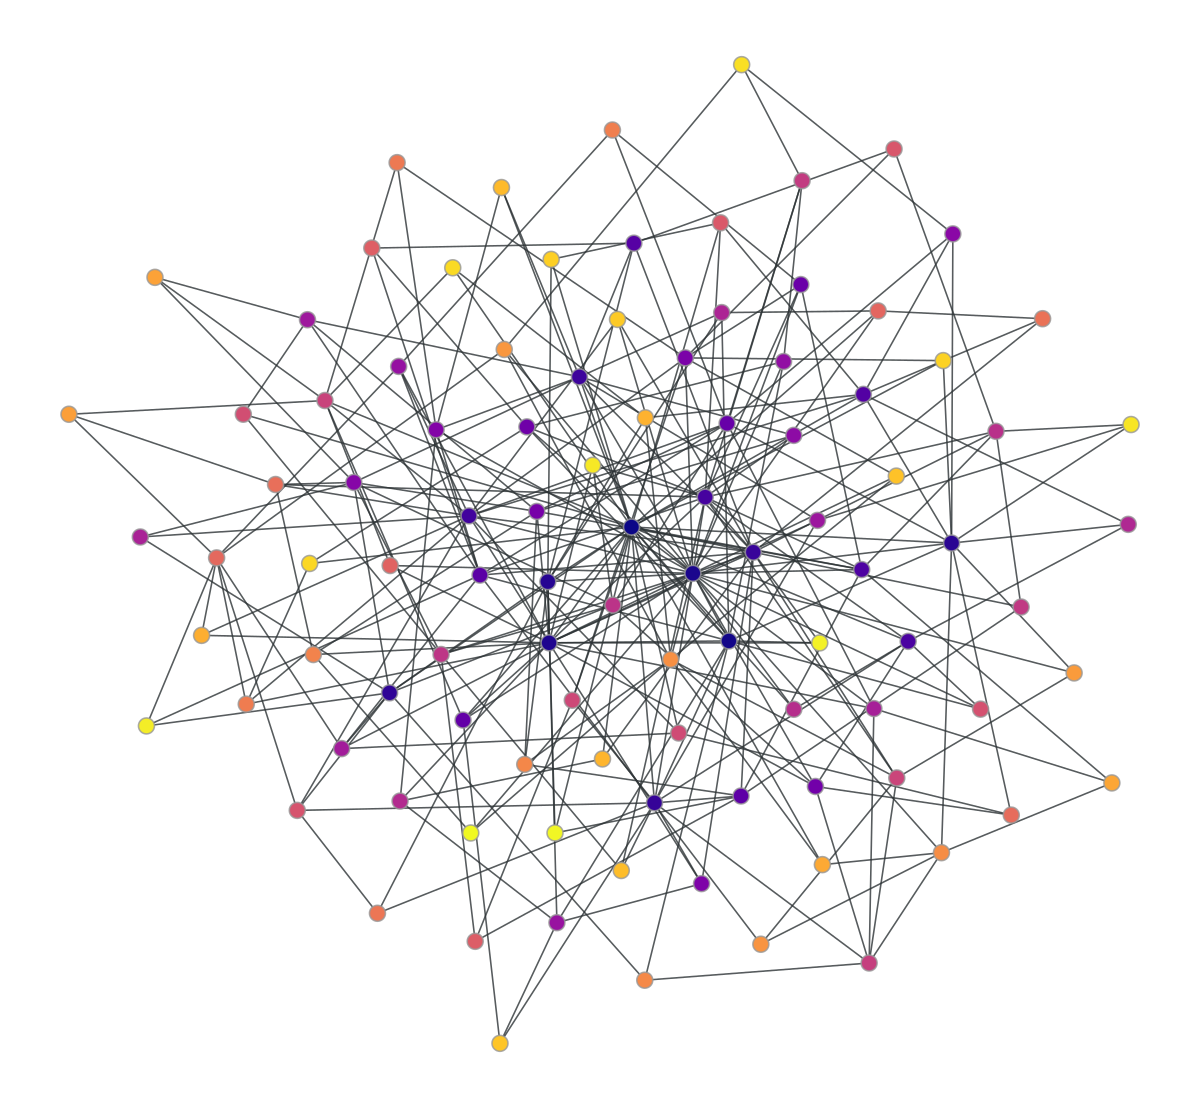

In [6]:
draw(g)

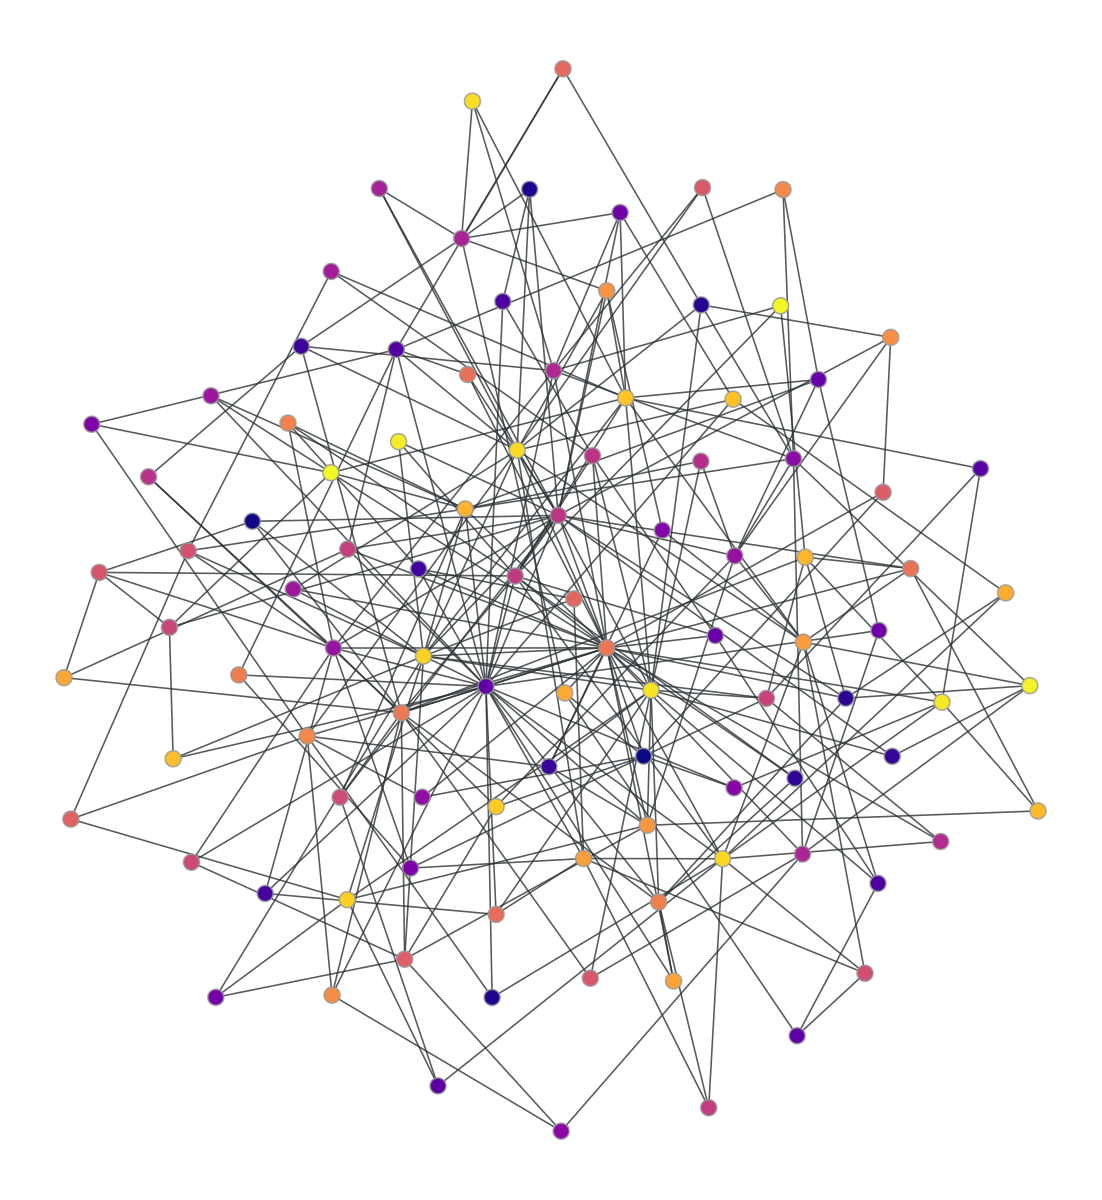

In [7]:
draw(graph_shuffle_indices(g))


In [8]:
A = adjacency_mat(g)

In [9]:
np.all(adjacency_mat(graph_from_friendliness_mat(A)) == A)

True

In [10]:
np.all(friendliness_mat(graph_from_friendliness_mat(A)) == A)

True